In [136]:
import pandas as pd
import numpy as np

#read in data
billboard = pd.read_csv('https://raw.githubusercontent.com/ga-students/DSI-DC-1/master/week-02/project-02/assets/billboard.csv?token=ARcgBw5vVrNR8kk1vQk_Xrq7aXXUD_JMks5XHtpkwA%3D%3D')


### take a look at data, inspect

In [137]:
# check out head

billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
# check out number of each genre

pd.value_counts(billboard['genre'])

Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

### do summary stats: mean, median, mode, std, variance, range

In [139]:
# find average length of song

def get_sec(s):
    '''convert time column to seconds'''
    l=s.split(':')
    x = int(int(l[0])*60+int(l[1]))
    return x

billboard['time'] = billboard['time'].apply(get_sec)

round(billboard['time'].mean(),1)

242.4

In [140]:
# median song length

round(billboard['time'].median(),1)

236.0

In [141]:
# std song length

round(billboard['time'].std(),2)

42.4

In [142]:
# range of song length

min = billboard['time'].min()
max = billboard['time'].max()
range = max-min
range

314

In [143]:
# mode of song length

billboard['time'].mode()

0    230
dtype: int64

In [144]:
# mean of first week

billboard['x1st.week'].mean()

79.9589905362776

### clean it: does it need to be sliced?

In [145]:
# yes needs to be sliced: slicing out song rankings

ranks = billboard.iloc[:,7:]

In [146]:
# now eliminating null values at rightmost portion of data frame

ranks_clean = ranks.iloc[:, 7:66]

In [147]:
# get the average of each of the rank columns

ranks_over_time = ranks_clean.apply(np.mean, axis = 0)

In [148]:
# create list of weeks

weeks = np.arange(len(ranks_over_time))
print len(weeks)
print len(ranks_over_time)

59
59


#### Below I plotted rank over time

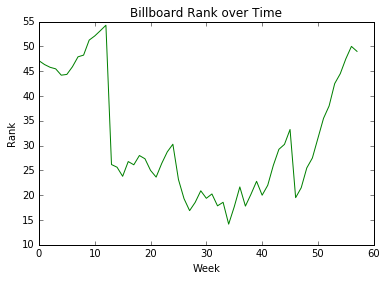

In [149]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(weeks, ranks_over_time, color = 'green')
plt.title('Billboard Rank over Time')
plt.ylabel('Rank')
plt.xlabel('Week')

### what data types are you working with?

In [150]:
#use .dtypes to find data types

billboard.iloc[:,0:8].dtypes

year                int64
artist.inverted    object
track              object
time                int64
genre              object
date.entered       object
date.peaked        object
x1st.week           int64
dtype: object

### do you need a series, data frame, or panel?

In [151]:
print "We're working with data frames primarily."

We're working with data frames primarily.
